# How To: Use a combinations matrix to keep track of combinabilities

## Preparations

In [1]:
# Set up the path to SModelS installation folder
import sys; sys.path.append("."); import smodels_paths

In [2]:
# Import those parts of smodels that are needed for this exercise
from smodels.base.physicsUnits import GeV
from smodels.experiment.databaseObj import Database
from smodels.matching.theoryPrediction import theoryPredictionsFor, TheoryPredictionsCombiner
from smodels.decomposition import decomposer
from smodels.base.physicsUnits import fb
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.base.model import Model

In [3]:
# a combinations matrix is just a dictionary with combinable analyses as both keys and values.
# we assume symmetricity! (if A is combinable with B, then B is combinable with A)
# Also, CMS results are automatically assumed to be combinable with ATLAS results,
# and 8 TeV with 13 TeV results.
combinationsmatrix = { "ATLAS-SUSY-2018-41": [ "ATLAS-SUSY-2019-08"]} 
# also define a list of analyses we are interested in
analyses = [ "CMS-SUS-21-002", "ATLAS-SUSY-2018-41", "ATLAS-SUSY-2019-08", "CMS-SUS-20-004"]

here is a visualisation of the combinations matrix for the analyses under consideration:

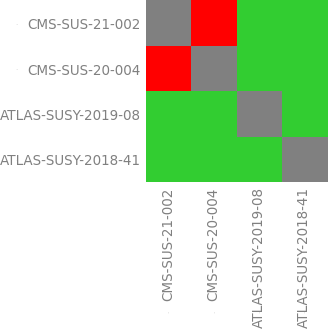

In [4]:
## Load the official database:
db = Database("official", combinationsmatrix=combinationsmatrix)
results = db.getExpResults(analysisIDs=analyses, dataTypes = [ "efficiencyMap"])
print ( f"we have selected {len(results)} analyses" )

we have selected 4 analyses


In [5]:
[ x.globalInfo.id for x in results ]

['ATLAS-SUSY-2018-41',
 'ATLAS-SUSY-2019-08',
 'CMS-SUS-20-004',
 'CMS-SUS-21-002']

In [6]:
# the theory we will be using
inputFile = "inputFiles/slha/ew_ymi2l51r.slha"

In [7]:
# prepare the model
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=inputFile)
# obtain the decomposed model
toplist = decomposer.decompose(model,sigmacut=0.*fb)

## run SModelS

In [8]:
# get the predictions
predictions = list ( theoryPredictionsFor(db, toplist, combinedResults=True ) )

In [9]:
# let's have a quick look at the predictions, and the (expected) r-values
[ (x.dataset.globalInfo.id, "r_exp=", round(x.getRValue(expected=True),3)) for x in predictions ]

[('ATLAS-SUSY-2018-41', 'r_exp=', 0.869),
 ('CMS-SUS-21-002', 'r_exp=', 1.158),
 ('ATLAS-SUSY-2019-08', 'r_exp=', 0.96)]

In [10]:
for i,pr1 in enumerate(predictions[:-1]):
    id1 = pr1.dataset.globalInfo.id
    for pr2 in predictions[i+1:]:
        id2 = pr2.dataset.globalInfo.id
        combinable = pr1.dataset.isCombinableWith(pr2.dataset)
        print ( f"can I combine {id1} with {id2}? {'yes' if combinable else 'no'}" )

can I combine ATLAS-SUSY-2018-41 with CMS-SUS-21-002? yes
can I combine ATLAS-SUSY-2018-41 with ATLAS-SUSY-2019-08? yes
can I combine CMS-SUS-21-002 with ATLAS-SUSY-2019-08? yes


## combine!

In [11]:
# given [10] from above, we are allowed to combine the three analyses listed below
analyses = [ "CMS-SUS-21-002", "ATLAS-SUSY-2018-41", "ATLAS-SUSY-2019-08"]
combiner = TheoryPredictionsCombiner.selectResultsFrom ( predictions, analyses )

In [12]:
# the combined expected r value must be above the individual expected r-values
round(combiner.getRValue(expected=True),3)

1.674